In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as PSNR
from scipy import signal
from skimage.util import random_noise

def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.max(G)

plt.gray()
lena= rgb2gray(imread('lena.tiff'))
frequnoisy = imread('frequnoisy.tif').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

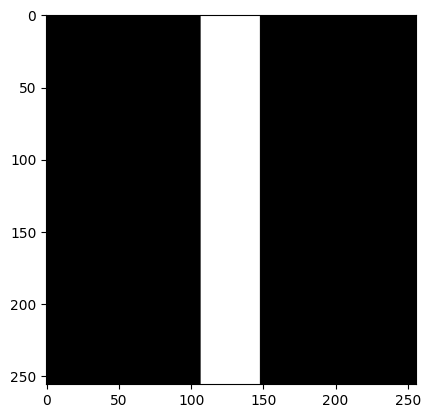

In [2]:
f = np.zeros((256,256))
f[:,107:148] = 1

plt.imshow(f, cmap='gray', vmin=0, vmax=1,)
plt.show()



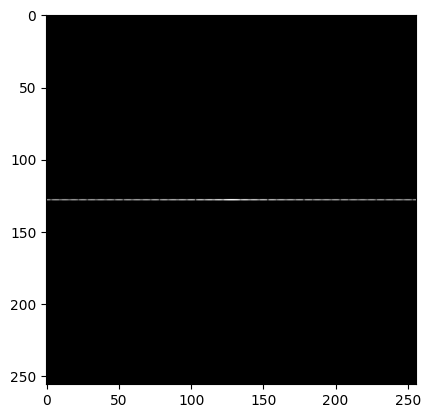

In [3]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(f)))+1), cmap='gray')
plt.show()

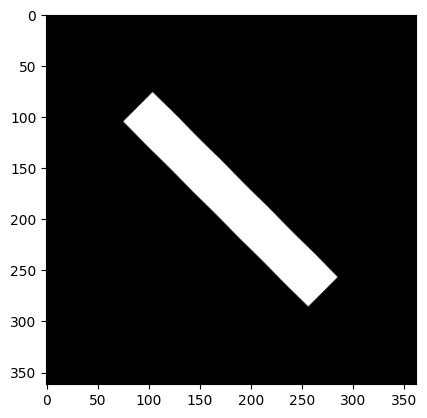

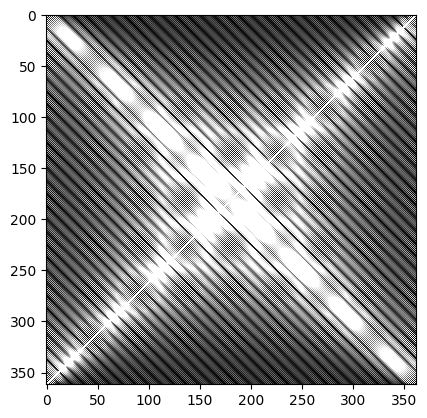

In [4]:

plt.imshow(rotate(f, 45, resize=True), cmap='gray', vmin=0, vmax=1,)
plt.show()
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rotate(f, 45, resize=True))))+1), cmap='gray', vmin=0, vmax=1,)    
plt.show()

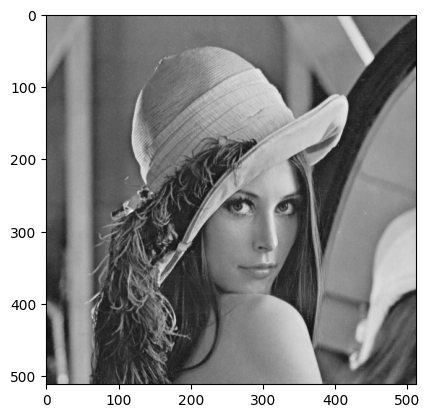

[[ 1.        +0.j         -0.16489296+0.98631147j  0.8144189 -0.58027739j
  ... -0.29817347-0.9545117j   0.8144189 +0.58027739j
  -0.16489296-0.98631147j]
 [-0.0500773 -0.99874535j -0.67657515+0.73637359j -0.99993753-0.01117752j
  ...  0.5942152 +0.8043061j  -0.63667291+0.77113397j
   0.00667498+0.99997772j]
 [-0.97636572-0.21612493j -0.8479919 -0.53000919j  0.81928077-0.57339255j
  ...  0.3452122 +0.93852466j -0.96307484-0.26923384j
   0.99703401-0.07696226j]
 ...
 [ 0.9029487 -0.42974836j  0.72320083+0.69063779j -0.9470089 -0.32120733j
  ...  0.99487911+0.10107199j  0.17360993-0.9848145j
  -0.0369565 +0.99931688j]
 [-0.97636572+0.21612493j  0.99703401+0.07696226j -0.96307484+0.26923384j
  ... -0.55489952-0.83191738j  0.81928077+0.57339255j
  -0.8479919 +0.53000919j]
 [-0.0500773 +0.99874535j  0.00667498-0.99997772j -0.63667291-0.77113397j
  ... -0.27241229+0.96218062j -0.99993753+0.01117752j
  -0.67657515-0.73637359j]]


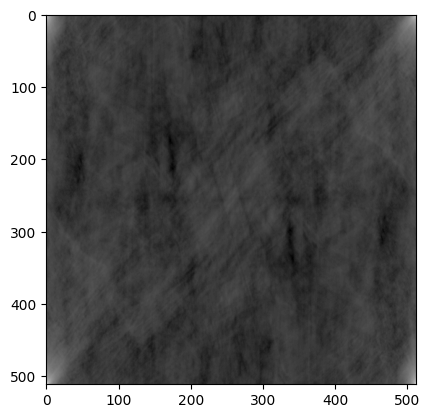

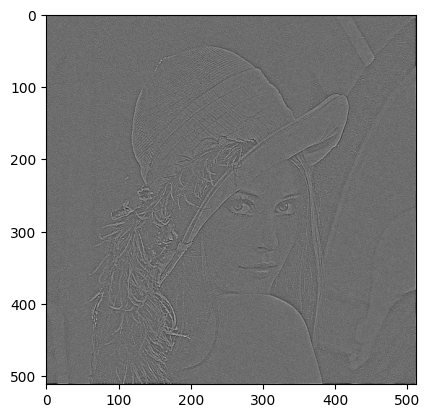

In [13]:
plt.imshow(lena, cmap='gray', vmin=0, vmax=1)
plt.show()

amplitude = np.abs(np.fft.fft2(lena))
# print(amplitude)
phase = ((np.fft.fft2(lena)))/amplitude
print(phase)

plt.imshow(np.log(np.real((np.fft.ifft2(amplitude)))), cmap='gray')
plt.show()
plt.imshow(np.log(np.real(np.fft.ifft2((phase)))+1), cmap='gray')
plt.show()

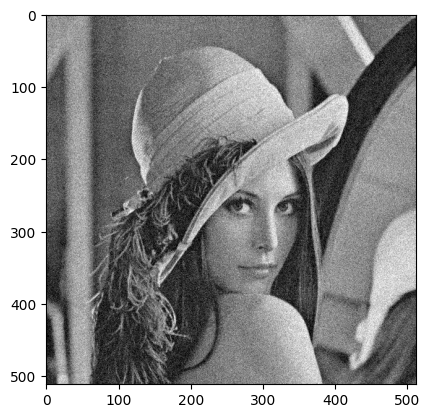

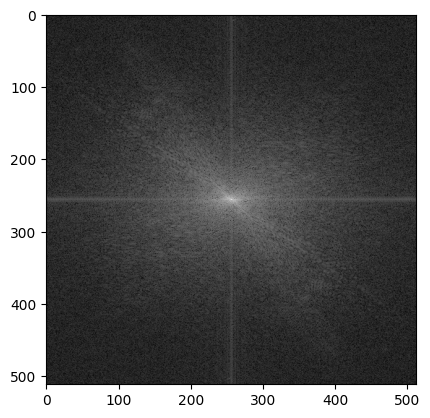

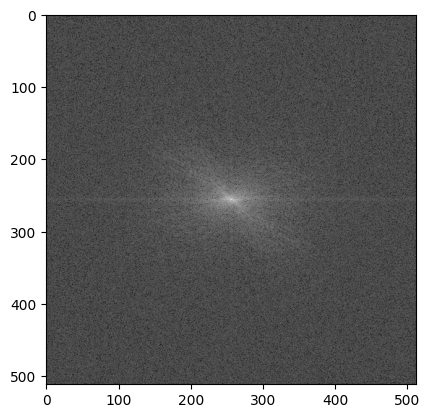

In [17]:
plt.imshow(random_noise(lena, mode='gaussian', var=0.005), cmap='gray', vmin=0, vmax=1,)   
plt.show()
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(lena)))+1), cmap='gray')
plt.show()
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(random_noise(lena, mode='gaussian', var=0.005))))+1), cmap='gray')
plt.show()

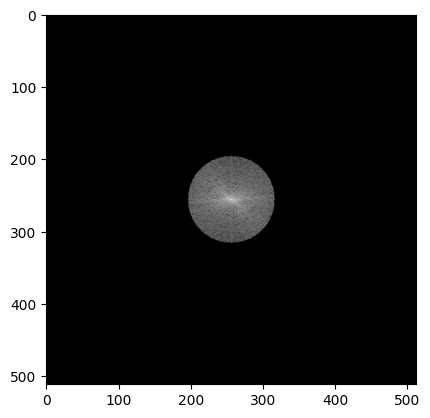

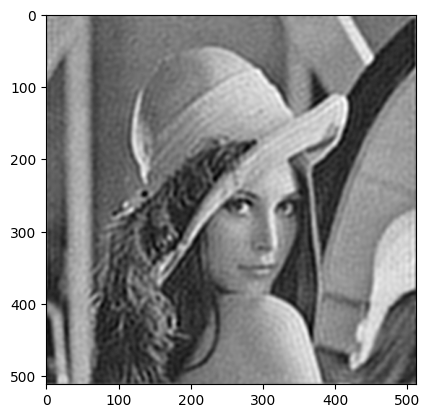

27.460765545741445


In [4]:
from skimage.morphology import disk
from skimage import metrics
r = 60
h = disk(r)

h_freq = np.zeros(lena.shape)
#h_freq[418//2-r: 418//2+r+1, 430//2-r: 430//2+r+1] = h
image_size = lena.shape

# 1. Create ideal low-pass filter
r = 60  # Cutoff radius
h = disk(r)
h_freq = np.zeros(image_size)
height, width = image_size

# Embed the disk into a zeroed-out frequency image
h_freq[height//2-r:height//2+r+1, width//2-r:width//2+r+1] = h

# 2. Compute Fourier transform of the noisy image
f_transform = np.fft.fftshift(np.fft.fft2(random_noise(lena, mode='gaussian', var=0.005)))

# 3. Apply the low-pass filter in the frequency domain
filtered_freq = f_transform * h_freq

plt.imshow(np.log(np.abs(filtered_freq)+1), cmap='gray')
plt.show()

# 4. Perform inverse Fourier transform to get denoised image
denoised_image = np.abs(np.fft.ifft2(np.fft.fftshift(filtered_freq)))

plt.imshow(denoised_image, cmap='gray')
plt.show()

# 5. Calculate PSNR between the original and denoised images
psnr_value = metrics.peak_signal_noise_ratio(lena, denoised_image)
print(psnr_value)   


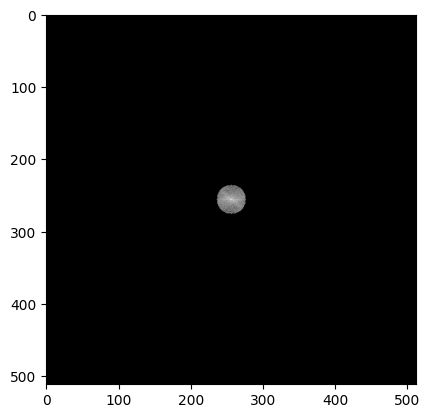

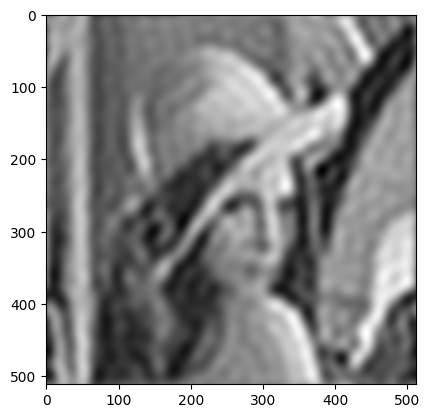

22.508341593645397


In [30]:
# 1. Create ideal low-pass filter
r = 20  # Cutoff radius
h = disk(r)
h_freq = np.zeros(image_size)
height, width = image_size

# Embed the disk into a zeroed-out frequency image
h_freq[height//2-r:height//2+r+1, width//2-r:width//2+r+1] = h

# 2. Compute Fourier transform of the noisy image
f_transform = np.fft.fftshift(np.fft.fft2(random_noise(lena, mode='gaussian', var=0.005)))

# 3. Apply the low-pass filter in the frequency domain
filtered_freq = f_transform * h_freq

plt.imshow(np.log(np.abs(filtered_freq)+1), cmap='gray')
plt.show()

# 4. Perform inverse Fourier transform to get denoised image
denoised_image = np.abs(np.fft.ifft2(np.fft.fftshift(filtered_freq)))

plt.imshow(denoised_image, cmap='gray') 
plt.show()

# 5. Calculate PSNR between the original and denoised images
psnr_value = metrics.peak_signal_noise_ratio(lena, denoised_image)
print(psnr_value)  

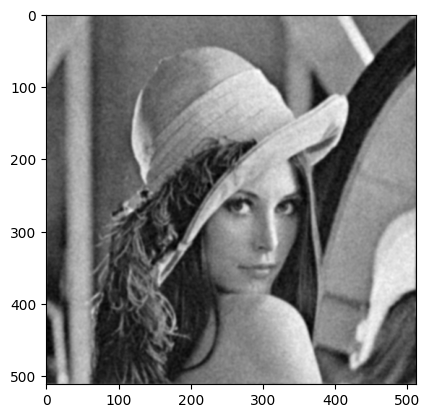

29.232852831711376


In [31]:
image_size = lena.shape

# 1. Create Gaussian low-pass filter
stdv = 60  # Standard deviation for Gaussian filter
gaussian_lp_filter = gaussian_filter(image_size[0], image_size[1], stdv)

# 2. Compute Fourier transform of the noisy image
f_transform = np.fft.fftshift(np.fft.fft2(random_noise(lena, mode='gaussian', var=0.005)))

# 3. Apply Gaussian filter in the frequency domain
filtered_freq = f_transform * gaussian_lp_filter

# 4. Perform inverse Fourier transform to get the denoised image
denoised_image = np.abs(np.fft.ifft2(np.fft.fftshift(filtered_freq)))
plt.imshow(denoised_image, cmap='gray')
plt.show()

# 5. Calculate PSNR between the original and denoised images
psnr_value = metrics.peak_signal_noise_ratio(lena, denoised_image)
print(psnr_value)

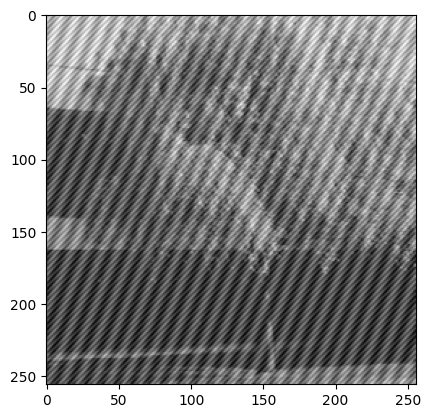

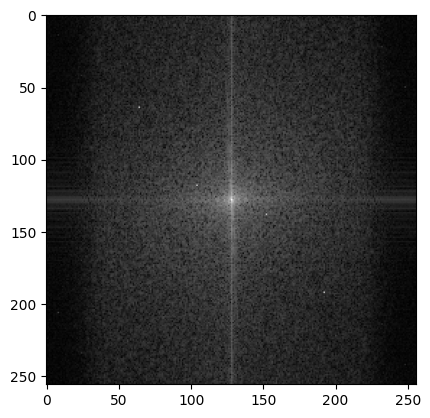

In [32]:
plt.imshow(frequnoisy, cmap='gray')
plt.show()

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(frequnoisy)))+1), cmap='gray')
plt.show()
xplot.plt(np.log(np.abs(np.fft.fftshift(np.fft.fft2(frequnoisy)))+1), cmap='gray')
plt.show()

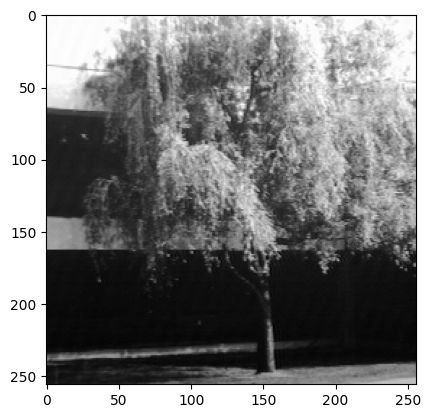

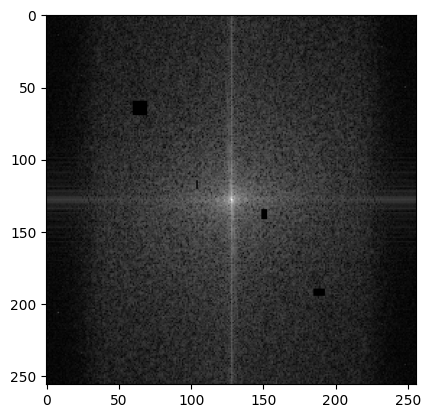

16.01623153245419


In [27]:

f_transform = np.fft.fftshift(np.fft.fft2(frequnoisy))
mask = np.ones(f_transform.shape, dtype=np.float32)

rows, cols = f_transform.shape
center_row, center_col = rows // 2, cols // 2

mask[60:70, 60:70] = 0  
mask[ 115:121, 104:105] = 0 
mask[135:142, 149:153 ] = 0
mask[190:195, 185:193 ] = 0
# Step 4: Apply the mask to the frequency transform
filtered_f_transform = f_transform * mask


# Step 5: Perform inverse Fourier Transform to get the denoised image
restored_image = np.log(np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_f_transform))+1))
plt.imshow(restored_image, cmap='gray')
plt.show()

plt.imshow(np.log(np.abs(filtered_f_transform)+1), cmap='gray')
plt.show()

# Step 6: Calculate PSNR between the original and denoised images
psnr_value = metrics.peak_signal_noise_ratio(frequnoisy, restored_image)
print(psnr_value)